<h1>PROJECT CITYBIKE LUBLIN                               

<span style="color:green">Import all nessesary libraries

In [79]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

<h1>CITYBIKE 2017

<h3> 1.READ DATA

<span style="color:green">Let's read data from 2017.xlsx file.

In [2]:
city_bike2017 = pd.read_excel('2017.xlsx',sheet_name= ['marzec','kwiecień','maj'])

In [3]:
city_bike2017['marzec'].head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,26627713,69277,2017-03-21 00:02:18,2017-03-21 00:02:44,315259,315259,0,991786
1,26627775,69756,2017-03-21 00:09:40,2017-03-21 00:22:59,673845,673845,0,864401
2,26627751,69631,2017-03-21 00:06:02,2017-03-21 00:23:46,673845,673845,0,864401
3,26627725,69455,2017-03-21 00:03:41,2017-03-21 00:27:37,315259,692596,100,991786
4,26627864,69692,2017-03-21 00:20:58,2017-03-21 00:28:56,315248,674263,0,868787


In [4]:
city_bike2017['kwiecień'].head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,27188150,69486,2017-03-31 23:56:26,2017-04-01 00:00:12,315273,315273,0,1514820
1,27187806,69557,2017-03-31 23:45:38,2017-04-01 00:00:39,315272,315269,0,2024593
2,27187791,69269,2017-03-31 23:45:14,2017-04-01 00:01:13,315272,315269,0,2024593
3,27187827,69321,2017-03-31 23:46:13,2017-04-01 00:01:24,315272,315269,0,2024593
4,27187995,69344,2017-03-31 23:51:28,2017-04-01 00:01:55,315248,315233,0,983017


In [5]:
city_bike2017['maj'].head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,28587694,69328,2017-04-30 23:57:00,2017-05-01 00:01:00,360123,315269,0,2043725
1,28587504,69174,2017-04-30 23:43:00,2017-05-01 00:02:00,315235,674353,0,865781
2,28587316,69391,2017-04-30 23:31:00,2017-05-01 00:02:00,315265,315248,100,975251
3,28587629,69507,2017-04-30 23:51:00,2017-05-01 00:02:00,315238,315236,0,1300588
4,28587614,69659,2017-04-30 23:50:00,2017-05-01 00:03:00,315242,315269,0,886601


In [6]:
#You have to merge dataframes by using 'append'

city_bike17 = city_bike2017['marzec'].append(city_bike2017['kwiecień'], ignore_index= True)
city_bike17 = city_bike17.append(city_bike2017['maj'], ignore_index= True)
city_bike17.head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,26627713,69277,2017-03-21 00:02:18,2017-03-21 00:02:44,315259,315259,0,991786
1,26627775,69756,2017-03-21 00:09:40,2017-03-21 00:22:59,673845,673845,0,864401
2,26627751,69631,2017-03-21 00:06:02,2017-03-21 00:23:46,673845,673845,0,864401
3,26627725,69455,2017-03-21 00:03:41,2017-03-21 00:27:37,315259,692596,100,991786
4,26627864,69692,2017-03-21 00:20:58,2017-03-21 00:28:56,315248,674263,0,868787


<span style="color:green">What would you like to  know about data?
    
<span style="color:green">Use DataFrame.info() and get information about:
    
<span style="color:green">-numbers of rows and coulmns 
    
<span style="color:green">-types of data
    
<span style="color:green">-are there missing values? 
    
<span style="color:green">-how many memory we need

In [7]:
city_bike17.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201078 entries, 0 to 201077
Data columns (total 8 columns):
uid               201078 non-null int64
bike_name         201078 non-null int64
start_time        201078 non-null datetime64[ns]
end_time          201078 non-null datetime64[ns]
start_place_id    201078 non-null int64
end_place_id      201078 non-null int64
price             201078 non-null int64
cust_id           201078 non-null int64
dtypes: datetime64[ns](2), int64(6)
memory usage: 12.3 MB


<span style="color:green">There are 201078 rows and 8 columns.

<span style="color:green">Dtypes: datetime64(2), int64(6)

<span style="color:green">There are not missing value - every columns has the same num non-null values

<span style="color:green">We use 13.8MB

In [8]:
#You can also use DataFrame.shape to get num of rows and columns and DataFrame.isnull to get num of non-null values
print(city_bike17.shape )
print(city_bike17.isnull().any().any()) #False means that you don't have any non-missing values'''

(201078, 8)
False


In [10]:
#create additional TIME columns so it would be easier to manipulate the data

city_bike17['start_day'] = pd.DatetimeIndex(city_bike17['start_time']).dayofyear

city_bike17['start_month'] = pd.DatetimeIndex(city_bike17['start_time']).month

city_bike17['day_of_month'] = pd.DatetimeIndex(city_bike17['start_time']).day

city_bike17['day_of_week'] = pd.DatetimeIndex(city_bike17['start_time']).dayofweek



#create additional duration column so it would be easier to manipulate the data

city_bike17['duration_min']= city_bike17['end_time']-city_bike17['start_time']
#city_bike17['duration_min']=pd.to_datetime(city_bike17['duration_min'])
city_bike17.head()


,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id,start_day,start_month,day_of_month,day_of_week,duration_min
0,26627713,69277,2017-03-21 00:02:18,2017-03-21 00:02:44,315259,315259,0,991786,80,3,21,1,00:00:26
1,26627775,69756,2017-03-21 00:09:40,2017-03-21 00:22:59,673845,673845,0,864401,80,3,21,1,00:13:19
2,26627751,69631,2017-03-21 00:06:02,2017-03-21 00:23:46,673845,673845,0,864401,80,3,21,1,00:17:44
3,26627725,69455,2017-03-21 00:03:41,2017-03-21 00:27:37,315259,692596,100,991786,80,3,21,1,00:23:56
4,26627864,69692,2017-03-21 00:20:58,2017-03-21 00:28:56,315248,674263,0,868787,80,3,21,1,00:07:58


In [11]:
#city_bike17.sort_values(by = ['duration_min'],ascending=False).head(1)
#city_bike17.iloc[[60233]]

<h3>2.DATA ANALYSIS

In [12]:
#For how many days were the bikes available for rental?

num_of_days = city_bike17['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} dyas')

The bikes were available for rental for 72 dyas


In [13]:
#how many rentals and bikes were there?

num_of_bikes = city_bike17['bike_name'].nunique()

num_of_rent = city_bike17['bike_name'].count()

print(f'Count of rentals:{num_of_rent}, \nCount of bikes: {num_of_bikes}')

Count of rentals:201078, 
Count of bikes: 850


In [14]:
#The average time of a rental:

avg_time = city_bike17['duration_min'].mean()

avg_time.components.minutes

print(f'The average time of rental: {avg_time.components.minutes}')

The average time of rental: 16


In [15]:
#Rentals under 15 minutes


city_bike17['duration_min'] = pd.DatetimeIndex(city_bike17['duration_min']).minute

rentals_under_15 = len(city_bike17[city_bike17['duration_min']<15])

print('Num of rentals under 15 minutes:', rentals_under_15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version



Num of rentals under 15 minutes: 137776


In [16]:
#Number of rentals per month, most popular month


top_month = city_bike17.groupby('start_month').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name
print(f'The most popular month is:{top_month}')

city_bike17.groupby('start_month').agg({'bike_name':'count'}).sort_values(by=['bike_name'], ascending=False)

The most popular month is:5


,bike_name
start_month,
5,105776
4,67152
3,28150


In [17]:
#daily top score

city_bike17['date'] = pd.DatetimeIndex(city_bike17['start_time']).date

print(city_bike17.groupby('date').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name)

city_bike17.groupby(['start_day']).agg({'bike_name':'count'}).sort_values(by=['bike_name'],ascending=False).head(1)


2017-04-02


,bike_name
start_day,
92,6092


In [18]:
#most popular start station

city_bike17['start_place_id'].value_counts().head(1)

315269    9187
Name: start_place_id, dtype: int64

In [19]:
#most popular end station

city_bike17['end_place_id'].value_counts().head(1)

315269    9967
Name: end_place_id, dtype: int64

In [20]:
#most rented bike

city_bike17['bike_name'].value_counts().head(1)

69617    439
Name: bike_name, dtype: int64

<h3>3.PLOTS

In [25]:
#create a plot for average rent number per month

average_rent = city_bike17.groupby('start_month').agg({'bike_name':'count'}) #I count num of rent per month
average_rent['num_day_in_month'] = city_bike17.groupby(['start_month'])[['day_of_month']].nunique() #I count num of days in month
average_rent['result'] = average_rent['bike_name']//average_rent['num_day_in_month'] #I count average rent number for every month
average_rent

,bike_name,num_day_in_month,result
start_month,,,
3,28150,11,2559
4,67152,30,2238
5,105776,31,3412


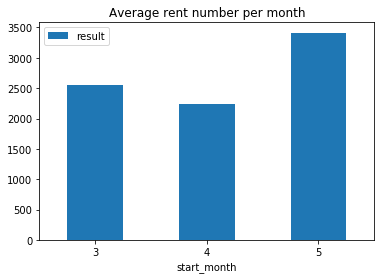

In [27]:
#use matplotlib
average_rent['result'].plot(kind = 'bar', rot=360, title = 'Average rent number per month', legend = True)

In [77]:
#this is the same plot but by using plotly

fig = go.FigureWidget(data=go.Bar(y=average_rent['result'], x = ['March','April','May']))
fig.update_layout(
    title={
        'text': 'Average rent number per month',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='indigo')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None

    )

fig.show()

In [66]:
#create a plot for average rent number per day of week

city_bike17['day_of_week'] = pd.DatetimeIndex(city_bike17['start_time']).dayofweek #I add a column with day of week 
rent_num_per_day = city_bike17.groupby('day_of_week').agg({'bike_name':['count']}) #I count num of rentals per day of week
rent_num_per_day

,bike_name
,count
day_of_week,
0,32631
1,36204
2,28630
3,23203
4,25546
5,27818
6,27046


In [69]:
num_of_day_df = pd.DataFrame(city_bike17.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()
rent_num_per_day['num_of_days']=num_of_day_df['day_of_week']
rent_num_per_day['num_per_day'] = rent_num_per_day['bike_name']['count'] / rent_num_per_day['num_of_days']
rent_num_per_day.round(2)


,bike_name,num_of_days,num_per_day
,count,,
day_of_week,,,
0,32631,10,3263.10
1,36204,11,3291.27
2,28630,11,2602.73
3,23203,10,2320.30
4,25546,10,2554.60
5,27818,10,2781.80
6,27046,10,2704.60


In [87]:
fig = px.bar(rent_num_per_day, x=rent_num_per_day.index, y='num_per_day')
fig.update_layout(
    title={
        'text': "Number of rentals per day of week.",
         'font': {
              'family': 'Calibri',
              'size': 30
        },
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='lightpink')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None
    )
fig.show()